# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to check these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Challenge Deliverable 1. Generate a Ride-Sharing DataFrame by City Type

In [3]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(["city"]).count()["ride_id"]
total_rides

city
Amandaburgh         18
Barajasview         22
Barronchester       16
Bethanyland         18
Bradshawfurt        10
                    ..
West Robert         31
West Samuelburgh    25
Williamsonville     14
Williamsstad        23
Williamsview        20
Name: ride_id, Length: 120, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers = pyber_data_df.groupby(["city"]).sum()["driver_count"]
total_drivers

C:\Users\andmarst\AppData\Local\Temp\ipykernel_27864\4028588364.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_drivers = pyber_data_df.groupby(["city"]).sum()["driver_count"]


city
Amandaburgh          216
Barajasview          572
Barronchester        176
Bethanyland          396
Bradshawfurt          70
                    ... 
West Robert         1209
West Samuelburgh    1825
Williamsonville       28
Williamsstad        1357
Williamsview         920
Name: driver_count, Length: 120, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(["city"]).sum()["fare"]
total_fares

C:\Users\andmarst\AppData\Local\Temp\ipykernel_27864\2807877828.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_fares = pyber_data_df.groupby(["city"]).sum()["fare"]


city
Amandaburgh         443.55
Barajasview         557.31
Barronchester       582.76
Bethanyland         593.21
Bradshawfurt        400.64
                     ...  
West Robert         778.84
West Samuelburgh    544.19
Williamsonville     446.25
Williamsstad        560.33
Williamsview        531.98
Name: fare, Length: 120, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fares = pyber_data_df.groupby(["city"]).mean()["fare"]
avg_fares

C:\Users\andmarst\AppData\Local\Temp\ipykernel_27864\3810042059.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_fares = pyber_data_df.groupby(["city"]).mean()["fare"]


city
Amandaburgh         24.641667
Barajasview         25.332273
Barronchester       36.422500
Bethanyland         32.956111
Bradshawfurt        40.064000
                      ...    
West Robert         25.123871
West Samuelburgh    21.767600
Williamsonville     31.875000
Williamsstad        24.362174
Williamsview        26.599000
Name: fare, Length: 120, dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_per_driver = total_fares.divide(total_drivers)
avg_per_driver

city
Amandaburgh          2.053472
Barajasview          0.974318
Barronchester        3.311136
Bethanyland          1.498005
Bradshawfurt         5.723429
                      ...    
West Robert          0.644202
West Samuelburgh     0.298186
Williamsonville     15.937500
Williamsstad         0.412918
Williamsview         0.578239
Length: 120, dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary = pd.DataFrame(columns = ['Total Rides', 'Total Drivers', 'Total Fares', 'Average Fare per Ride', 'Average Fare per Driver'])
pyber_summary['Total Rides'] =  total_rides
pyber_summary['Total Drivers'] =  total_drivers
pyber_summary['Total Fares'] =  total_fares
pyber_summary['Average Fare per Ride'] =  avg_fares
pyber_summary['Average Fare per Driver'] =  avg_per_driver

pyber_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
city,,,,,
Amandaburgh,18,216,443.55,24.641667,2.053472
Barajasview,22,572,557.31,25.332273,0.974318
Barronchester,16,176,582.76,36.422500,3.311136
Bethanyland,18,396,593.21,32.956111,1.498005
Bradshawfurt,10,70,400.64,40.064000,5.723429
...,...,...,...,...,...
West Robert,31,1209,778.84,25.123871,0.644202
West Samuelburgh,25,1825,544.19,21.767600,0.298186
Williamsonville,14,28,446.25,31.875000,15.937500


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary.index.name = None

pyber_summary

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Amandaburgh,18,216,443.55,24.641667,2.053472
Barajasview,22,572,557.31,25.332273,0.974318
Barronchester,16,176,582.76,36.422500,3.311136
Bethanyland,18,396,593.21,32.956111,1.498005
Bradshawfurt,10,70,400.64,40.064000,5.723429
...,...,...,...,...,...
West Robert,31,1209,778.84,25.123871,0.644202
West Samuelburgh,25,1825,544.19,21.767600,0.298186
Williamsonville,14,28,446.25,31.875000,15.937500
Williamsstad,23,1357,560.33,24.362174,0.412918


In [10]:
#  8. Format the columns.
pyber_summary.style.format({"Total Rides": '{:,}',"Total Drivers": '{:,}',"Total Fares": '${:.2f}',"Average Fare per Ride": '${:.2f}',"Average Fare per Driver": '${:.2f}'})


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Amandaburgh,18,216,$443.55,$24.64,$2.05
Barajasview,22,572,$557.31,$25.33,$0.97
Barronchester,16,176,$582.76,$36.42,$3.31
Bethanyland,18,396,$593.21,$32.96,$1.50
Bradshawfurt,10,70,$400.64,$40.06,$5.72
Brandonfort,19,190,$673.31,$35.44,$3.54
Carriemouth,27,"1,404",$764.49,$28.31,$0.54
Christopherfurt,27,"1,107",$661.55,$24.50,$0.60
Colemanland,22,506,$679.68,$30.89,$1.34
Davidfurt,17,391,$543.93,$32.00,$1.39


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# Print the merged DataFrame for reference.
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [12]:
# 1. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
cdfares = pyber_data_df.groupby(["city", "date"]).sum()["fare"]
cdfares

C:\Users\andmarst\AppData\Local\Temp\ipykernel_27864\1464768539.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cdfares = pyber_data_df.groupby(["city", "date"]).sum()["fare"]


city          date               
Amandaburgh   2019-01-02 09:57:04    33.06
              2019-01-11 02:22:07    29.24
              2019-01-13 16:04:10    23.35
              2019-01-21 04:12:54     9.26
              2019-01-29 23:28:12    41.06
                                     ...  
Williamsview  2019-04-15 16:09:08    44.74
              2019-04-16 08:23:02    20.38
              2019-04-18 02:07:15    39.79
              2019-04-26 00:30:10    20.89
              2019-05-04 14:56:45    32.80
Name: fare, Length: 2375, dtype: float64

In [13]:
# 2. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
cdfares = cdfares.reset_index()
cdfares

,city,date,fare
0,Amandaburgh,2019-01-02 09:57:04,33.06
1,Amandaburgh,2019-01-11 02:22:07,29.24
2,Amandaburgh,2019-01-13 16:04:10,23.35
3,Amandaburgh,2019-01-21 04:12:54,9.26
4,Amandaburgh,2019-01-29 23:28:12,41.06
...,...,...,...
2370,Williamsview,2019-04-15 16:09:08,44.74
2371,Williamsview,2019-04-16 08:23:02,20.38
2372,Williamsview,2019-04-18 02:07:15,39.79
2373,Williamsview,2019-04-26 00:30:10,20.89


In [14]:
# 3. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_date_pivot = cdfares.pivot(index=["date"], columns=["city"],values="fare")
fares_date_pivot

city,Amandaburgh,Barajasview,Barronchester,Bethanyland,Bradshawfurt,Brandonfort,Carriemouth,Christopherfurt,Colemanland,Davidfurt,...,West Heather,West Heidi,West Josephberg,West Kimmouth,West Patrickchester,West Robert,West Samuelburgh,Williamsonville,Williamsstad,Williamsview
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:08:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 00:46:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 02:07:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:46:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 05:23:21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-08 04:20:00,NaN,NaN,NaN,NaN,NaN,NaN,21.99,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-08 04:39:49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-08 07:29:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# 4. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.

jan_apr = fares_date_pivot.loc['2019-01-01':'2019-04-28']

In [16]:
# 5. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
jan_apr.index = pd.to_datetime(jan_apr.index)

In [17]:
# 6. Check that the datatype for the index is datetime using df.info()
jan_apr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Columns: 120 entries, Amandaburgh to Williamsview
dtypes: float64(120)
memory usage: 2.0 MB


In [18]:
# 7. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
jan_apr = jan_apr.resample('W').sum()

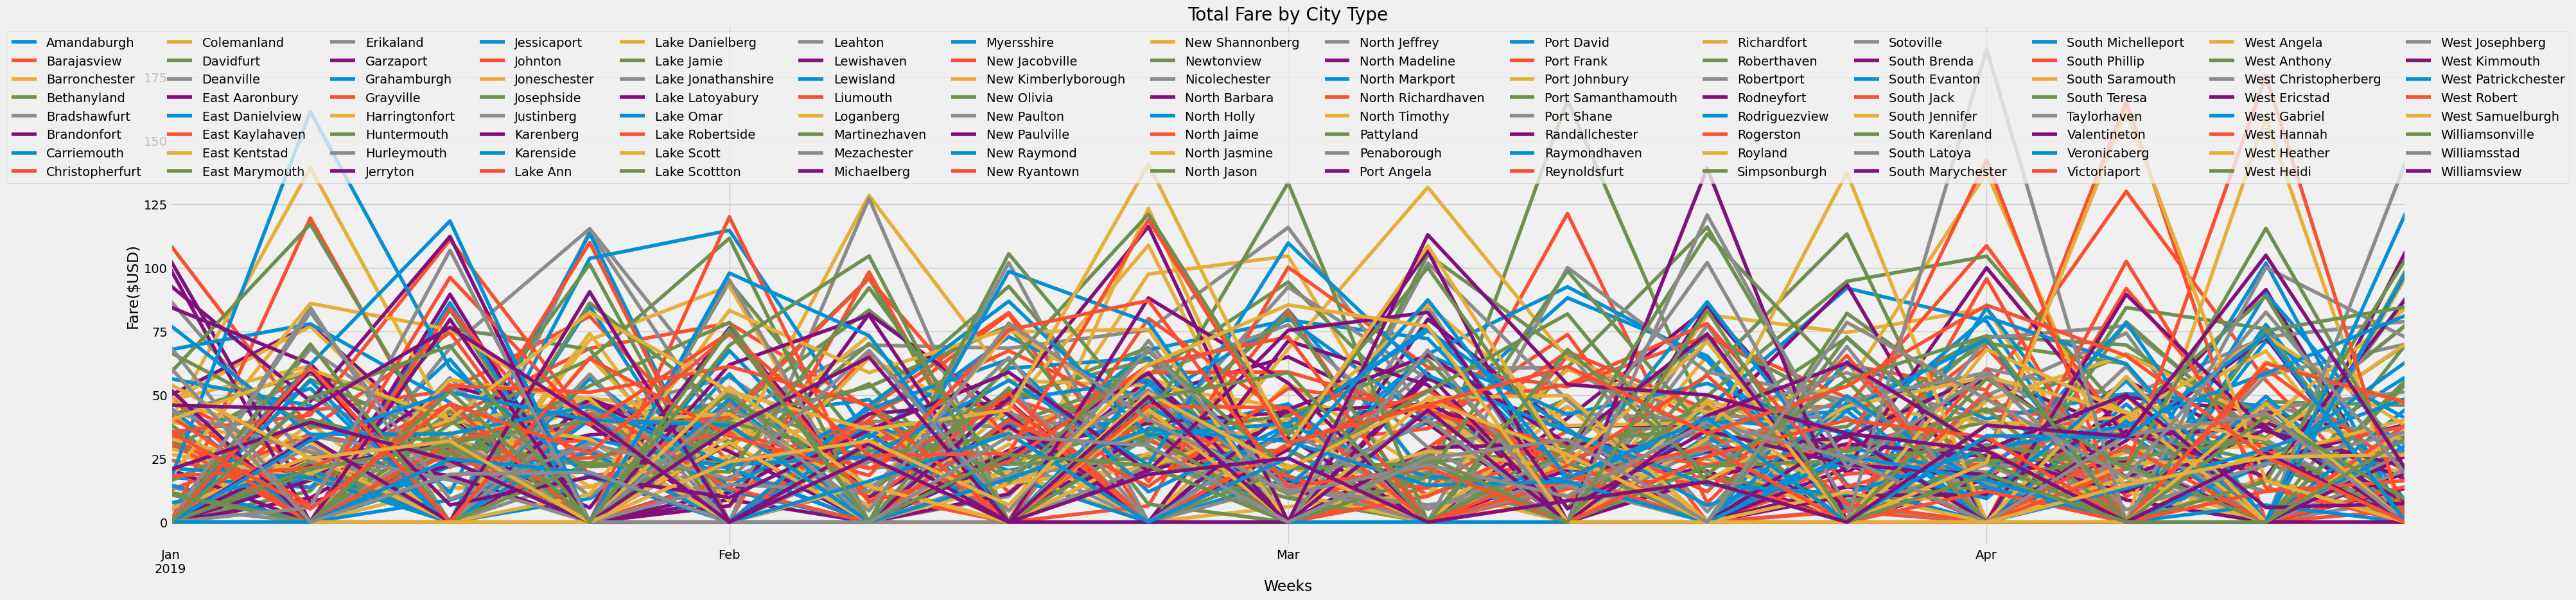

<Figure size 640x480 with 0 Axes>

In [33]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


jan_apr.plot(figsize=(40,10))
plt.title("Total Fare by City Type")
plt.ylabel("Fare($USD)")
plt.xlabel("Weeks", rotation='horizontal')
plt.legend(loc="upper center", ncols=15)

plt.show()

plt.savefig('analysis\PyBer_fare_summary.png')